In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

Use SQLAlchemy create_engine to connect to your sqlite database.

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

Use SQLAlchemy automap_base() to reflect your tables into classes... 

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurements', 'stations']

...and save a reference to those classes called Station and Measurement.

In [5]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [6]:
session = Session(engine)

In [18]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [13]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

Design a query to retrieve the last 12 months of precipitation data. Select only the date and prcp values.

In [17]:
last_year_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).order_by(Measurement.date).all()
for data in last_year_rain:
    print(data)

('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', 0.0)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', 0.0)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.02)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.05)
('2016-08-31', 0.13)
('2016-08-31', 0.1)
('2016-08-31', 0.0)
('2016-08-3

('2016-11-27', 0.0)
('2016-11-27', 0.17)
('2016-11-27', 0.29)
('2016-11-28', 0.01)
('2016-11-28', 0.02)
('2016-11-28', 0.0)
('2016-11-28', 0.0)
('2016-11-28', 0.0)
('2016-11-28', 0.0)
('2016-11-28', 0.69)
('2016-11-29', 0.0)
('2016-11-29', 0.04)
('2016-11-29', 0.04)
('2016-11-29', 0.0)
('2016-11-29', 0.06)
('2016-11-29', 0.09)
('2016-11-29', 0.2)
('2016-11-30', 0.14)
('2016-11-30', 0.05)
('2016-11-30', 0.03)
('2016-11-30', 0.0)
('2016-11-30', 0.0)
('2016-11-30', 0.05)
('2016-11-30', 0.79)
('2016-12-01', 0.12)
('2016-12-01', 0.33)
('2016-12-01', 0.07)
('2016-12-01', 0.0)
('2016-12-01', 0.16)
('2016-12-01', 0.37)
('2016-12-01', 0.72)
('2016-12-02', 0.03)
('2016-12-02', 0.3)
('2016-12-02', 0.4)
('2016-12-02', 0.0)
('2016-12-02', 0.01)
('2016-12-02', 0.35)
('2016-12-02', 1.27)
('2016-12-03', 0.0)
('2016-12-03', 0.04)
('2016-12-03', 0.26)
('2016-12-03', 0.02)
('2016-12-03', 0.77)
('2016-12-03', 1.62)
('2016-12-04', 0.03)
('2016-12-04', 0.1)
('2016-12-04', 0.0)
('2016-12-04', 0.32)
('2016-12

Load the query results into a Pandas DataFrame and set the index to the date column.

In [21]:
precipitation_df = pd.DataFrame(last_year_rain, columns = ["date", "prcp"])
precipitation_df = precipitation_df.set_index("date")
precipitation_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


Plot the results using the DataFrame plot method.

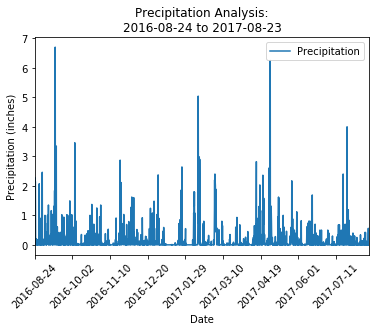

In [28]:
precipitation_df.plot(use_index=True)
plt.title("Precipitation Analysis:\n2016-08-24 to 2017-08-23")
plt.legend(["Precipitation"])
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)

plt.show()

Use Pandas to print the summary statistics for the precipitation data.

In [29]:
precipitation_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


Design a query to calculate the total number of stations.

In [30]:
station_count = session.query(Station.station).count()
print(station_count)

9


Design a query to find the most active stations. List the stations and observation counts in descending order.
Which station has the highest number of observations?

In [33]:
station_active = session.query(Measurement.station, func.count(Measurement.tobs)\
                                   ).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

print('The most active stations:')
for station, count in station_active:
    print(station, count)

The most active stations:
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


Design a query to retrieve the last 12 months of temperature observation data (tobs).
Filter by the station with the highest number of observations.

In [53]:
last_12_tobs = session.query(Measurement.station, Measurement.tobs).filter((Measurement.date > last_year) 
                                                      & (Measurement.station == highest_station)\
                                                     ).order_by(Measurement.tobs.desc()).all()

for obs in last_12_tobs:
    print(obs)

('USC00519281', 83)
('USC00519281', 82)
('USC00519281', 82)
('USC00519281', 82)
('USC00519281', 81)
('USC00519281', 81)
('USC00519281', 81)
('USC00519281', 81)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 80)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 79)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)
('USC00519281', 78)


Plot the results as a histogram with bins=12.

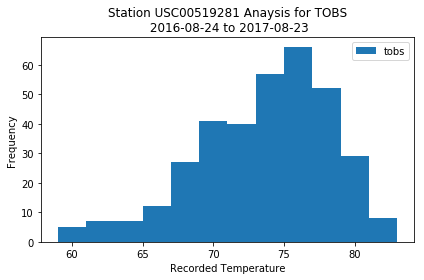

In [55]:
tobs_df = pd.DataFrame(last_12_tobs)
plt.hist(tobs_df["tobs"], 12)

plt.legend(["tobs"])
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station USC00519281 Anaysis for TOBS\n 2016-08-24 to 2017-08-23")
plt.tight_layout()

plt.show()

Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

In [56]:
def calc_temps(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)\
                        ).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01").

In [57]:
start_trip = dt.date(2018, 4, 10)
end_trip = dt.date(2018, 4, 24)

previous_year = dt.timedelta(days=366)
trip_results = (calc_temps((start_trip - previous_year), (end_trip - previous_year)))

print(trip_results)

[(67, 73.43617021276596, 83)]


Plot the min, avg, and max temperature from your previous query as a bar chart.
Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

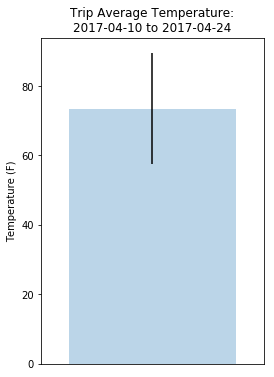

In [60]:
trip_avg = trip_results[0][1]
trip_min = trip_results[0][0]
trip_max = trip_results[0][2]

trip_diff = trip_max - trip_min

plt.figure(figsize=(4, 6))
plt.bar(0, trip_avg, alpha = 0.3, width = 1.5)

plt.xlim(-1, 1)
plt.errorbar(0, trip_avg, xerr = None, yerr = trip_diff, color = "black")
plt.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")

plt.title("Trip Average Temperature:\n2017-04-10 to 2017-04-24")
plt.ylabel("Temperature (F)")

plt.show()